<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/pristine_DTG_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [ ]:
df =  pd.read_csv("/content/PRISTINE PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 3':"Weight loss", 'Unnamed: 4':"DTG",'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)

,time,tem,heating rate,Weight loss,DTG,label
4050,67.48333333,967.66,14.33924426,56.454816,-0.013943,Validation
4051,67.5,967.85,14.33851852,56.454816,-0.013939,Training
4052,67.51666667,967.97,14.33675636,56.454816,-0.013936,Training
4053,67.53333333,968.2,14.33662389,56.454816,-0.013933,Training
4054,67.55,968.41,14.33619541,56.454816,-0.013929,Training


In [ ]:
df_res =  df_na[['time', 'tem', 'heating rate', 'DTG']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(12, activation="sigmoid"),
        layers.Dense(1),
    ]
) 
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4) 

Epoch 1/50
195/195 [==============================] - 2s 5ms/step - loss: 0.0070 - root_mean_squared_error: 0.0835 - val_loss: 7.7858e-06 - val_root_mean_squared_error: 0.0028
Epoch 2/50
195/195 [==============================] - 1s 4ms/step - loss: 4.2496e-05 - root_mean_squared_error: 0.0065 - val_loss: 5.3755e-06 - val_root_mean_squared_error: 0.0023
Epoch 3/50
195/195 [==============================] - 1s 3ms/step - loss: 5.3145e-06 - root_mean_squared_error: 0.0023 - val_loss: 7.6071e-07 - val_root_mean_squared_error: 8.7219e-04
Epoch 4/50
195/195 [==============================] - 1s 3ms/step - loss: 1.5117e-06 - root_mean_squared_error: 0.0012 - val_loss: 1.1469e-06 - val_root_mean_squared_error: 0.0011
Epoch 5/50
195/195 [==============================] - 1s 3ms/step - loss: 1.3280e-06 - root_mean_squared_error: 0.0012 - val_loss: 7.7660e-07 - val_root_mean_squared_error: 8.8125e-04
Epoch 6/50
195/195 [==============================] - 1s 3ms/step - loss: 1.2907e-06 - root_mean

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 12)                72        
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


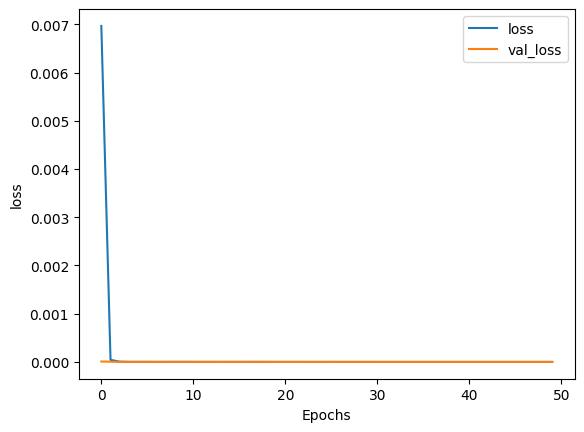

In [ ]:
met_df  = pd.DataFrame(model.history.history)
plt.plot(met_df['loss'], label = 'loss')
plt.plot(met_df['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

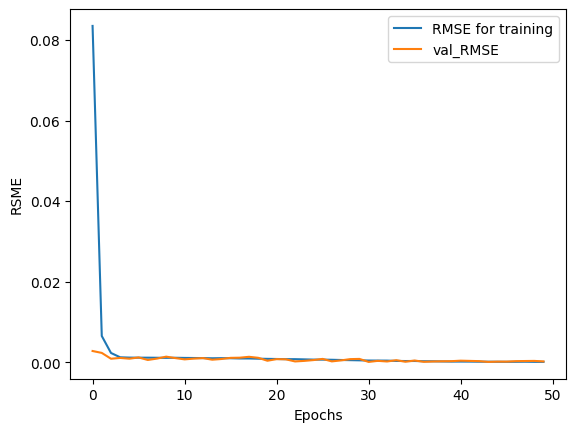

In [ ]:
plt.plot(met_df['root_mean_squared_error'], label = 'RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label = 'val_RMSE')
plt.xlabel('Epochs')
plt.ylabel('RSME')
plt.legend()

In [ ]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val) 
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df

13/13 [==============================] - 0s 1ms/step


,time,tem,heating rate,preditions,DTG
0,0.000004,0.033315,0.999445,-0.000181,9.051003e-08
1,0.000313,0.301892,0.953342,-0.000159,8.167232e-07
2,0.000523,0.384615,0.923077,-0.000109,0.000000e+00
3,0.000817,0.470588,0.882353,-0.000058,1.267761e-06
4,0.001354,0.582518,0.812816,-0.000013,1.563194e-06
...,...,...,...,...,...
400,0.069270,0.997486,0.014936,0.000266,-8.583528e-07
401,0.069312,0.997484,0.014910,0.000266,-8.573788e-07
402,0.069412,0.997477,0.014858,0.000267,-6.673923e-05
403,0.069495,0.997472,0.014818,0.000267,-1.441698e-05


In [ ]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 1.7457248234804404e-08
RMSE 0.00013212588026122817
MAE 8.834987627634434e-05
R2_Score -13.0537977197004


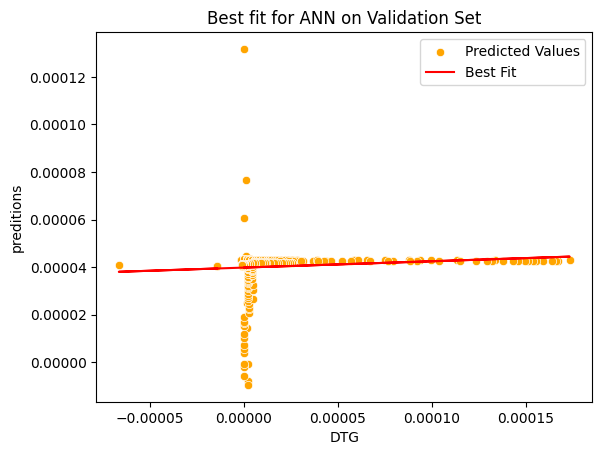

In [ ]:
x = final_df['DTG']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df, x='DTG', y='preditions', color='orange', label='Predicted Values')
plt.plot(x, a*x+b, color='red', label = 'Best Fit') 
plt.title('Best fit for ANN on Validation Set')
plt.legend()

In [ ]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']

predictions = model.predict(X_test)  
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 2ms/step
MSE 1.7403706425135098e-08
RMSE 0.00013192310800286315
MAE 8.848245955881933e-05
R2_Score -12.969456845055339


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000015,0.066519,0.997785,-0.000177,1.807016e-07
1,0.000225,0.257663,0.966235,-0.000162,6.977295e-07
2,0.000485,0.371391,0.928477,-0.000119,0.000000e+00
3,0.001150,0.544988,0.838443,-0.000025,1.464476e-06
4,0.001458,0.599999,0.799999,-0.000008,1.608853e-06
...,...,...,...,...,...
401,0.069281,0.997485,0.014929,0.000266,-8.580666e-07
402,0.069359,0.997481,0.014884,0.000266,-8.564689e-07
403,0.069380,0.997479,0.014873,0.000266,-8.560859e-07
404,0.069510,0.997471,0.014810,0.000267,-1.440581e-05


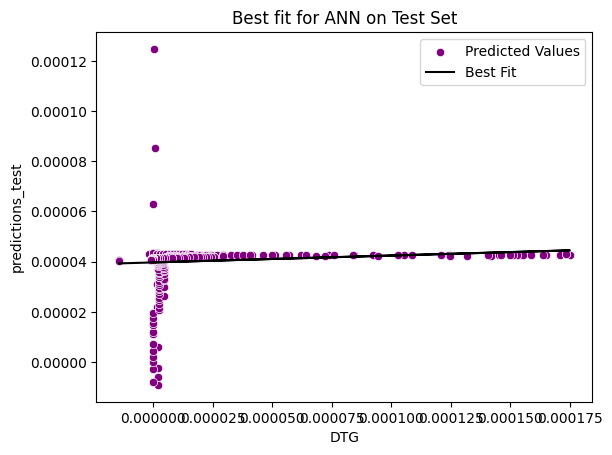

In [ ]:
x = final_df_test['DTG']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df_test, x='DTG', y='predictions_test', color='purple', label='Predicted Values')
plt.plot(x, a*x+b, color='black', label = 'Best Fit') 
plt.title('Best fit for ANN on Test Set')
plt.legend()

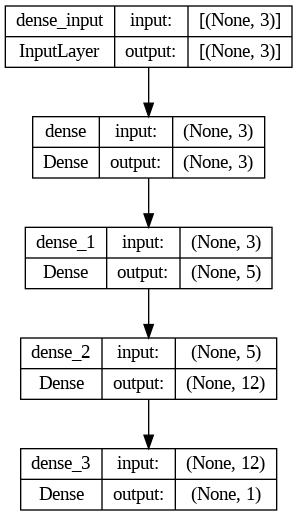

In [ ]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)